In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

data =  pd.read_csv("diabetes.csv")
data['ONE'] = 1
map_once = 0
drop_once = 0 ## Use the two above values to avoid dropping and mapping data multiple times later on if the code cell is rerun

In [3]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ONE
0,Female,80.0,0,1,never,25.19,6.6,140,0,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1
2,Male,28.0,0,0,never,27.32,5.7,158,0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1
4,Male,76.0,1,1,current,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,1
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,1
99997,Male,66.0,0,0,former,27.83,5.7,155,0,1
99998,Female,24.0,0,0,never,35.42,4.0,100,0,1


Text(0, 0.5, 'Total')

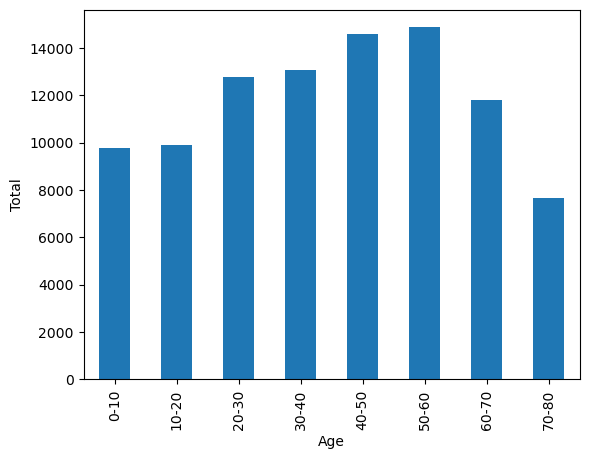

In [7]:
bins= [0,10,20,30,40,50,60,70,80]
ranges = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
data['Age_Range'] = pd.cut(data['age'], bins=bins, labels=ranges, right=False)

age_total = data.groupby("Age_Range")["ONE"].sum()
age_total.plot(kind='bar')

mp.pyplot.xlabel('Age')
mp.pyplot.ylabel('Total')

In [8]:
age_sum = data.groupby('Age_Range')['Age_Range'].agg(['count']).reset_index()
age_sum

,Age_Range,count
0,0-10,9762
1,10-20,9906
2,20-30,12767
3,30-40,13052
4,40-50,14595
5,50-60,14863
6,60-70,11780
7,70-80,7654


In [9]:
data.drop('Age_Range', axis=1, inplace=True)

In [5]:
male_occ = data.loc[data['gender'] == 'Male', 'diabetes'].sum()
male_occ

male_tot = data.loc[data['gender'] == 'Male', 'ONE'].sum()
male_tot

fem_occ = data.loc[data['gender'] == 'Female', 'diabetes'].sum()
fem_occ

fem_tot = data.loc[data['gender'] == 'Female', 'ONE'].sum()
fem_tot

male_perc = male_occ/male_tot

fem_perc = fem_occ/fem_tot


print('Male Percentage:', format(male_perc,'.2%'))
print('Female Percentage:', format(fem_perc,'.2%'))

Male Percentage: 9.75%
Female Percentage: 7.62%


220


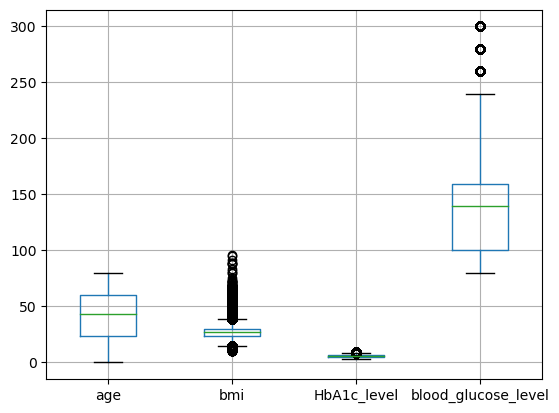

In [6]:
data_nums = data.filter(['age', 'bmi','HbA1c_level','blood_glucose_level'])

boxPlot = data_nums.boxplot()
boxPlot

print(data['blood_glucose_level'].max() - data['blood_glucose_level'].min())

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
ONE                    0
dtype: int64

In [8]:
data['smoking_history'].fillna('No Info', inplace=True)
data['smoking_history'].replace(['nan', 'NaN'], np.nan, inplace=True)

Age_Range has null values but we are ignoring it as it will not be a feature in our final MLA


In [9]:
print(data.nunique())

print('gender:',data['gender'].unique())
print( 'age:', data['age'].unique())
print( 'hypertension:', data['hypertension'].unique())
print('heart_disease:', data['heart_disease'].unique())
print( 'smoking_history:', data['smoking_history'].unique())
print( 'bmi:', data['bmi'].unique())
print( 'HbA1c_level:', data['HbA1c_level'].unique())
print( 'blood_glucose_level:', data['blood_glucose_level'].unique())
print( 'diabetes:', data['diabetes'].unique())

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
ONE                       1
dtype: int64
gender: ['Female' 'Male' 'Other']
age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension: [0 1]
heart_disease: [1 0]
smoking_history

In [10]:
if map_once != 1:
    data['gender'] = data['gender'].map({'Female':0,'Male':1, 'Other':2 })
    data['smoking_history'] = data['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})
data
map_once = 1 #Added this to avoid this being run multiple times...

print('gender:',data['gender'].unique())
print( 'smoking_history:', data['smoking_history'].unique())

gender: [0 1 2]
smoking_history: [0 1 2 3 4 5]


<Axes: >

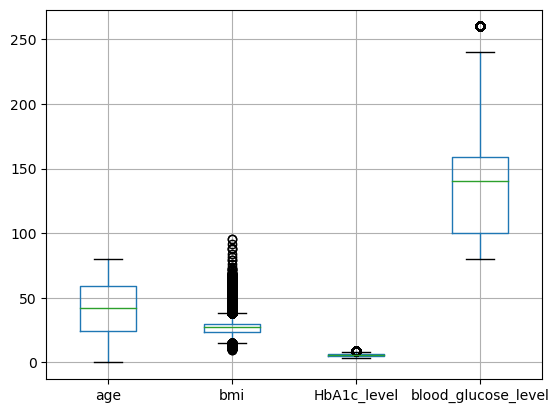

In [11]:
std = data['blood_glucose_level'].std()
mean = data['blood_glucose_level'].mean()
tea_std = mean + (std*3)

if drop_once != 1:
    data.drop(data.loc[data['blood_glucose_level'] > tea_std].index, inplace=True)


data_nums = data.filter(['age', 'bmi','HbA1c_level','blood_glucose_level'])

boxPlot = data_nums.boxplot()
boxPlot

In [12]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ONE
0,0,80.0,0,1,0,25.19,6.6,140,0,1
1,0,54.0,0,0,1,27.32,6.6,80,0,1
2,1,28.0,0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,2,23.45,5.0,155,0,1
4,1,76.0,1,1,2,20.14,4.8,155,0,1


In [16]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
            'bmi', 'HbA1c_level', 'blood_glucose_level']

target_variable = 'diabetes'

# Prepare inputs and outputs
inputs = data[features].values
outputs = data[target_variable].astype(int)

# Split the data
in_tr, in_te, out_tr, out_te = train_test_split(inputs, outputs, test_size=.5, random_state=42)

# Initialize the Decision Tree Classifier
tree_d = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                                min_samples_leaf=10, min_samples_split=3, splitter='best', random_state=42)

# Fit the model
tree_d.fit(in_tr, out_tr)

# Make predictions
prediction = tree_d.predict(in_te)

# Evaluate the model
accuracy = accuracy_score(out_te, prediction)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


[[45802     0]
 [ 1417  2080]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45802
           1       1.00      0.59      0.75      3497

    accuracy                           0.97     49299
   macro avg       0.98      0.80      0.87     49299
weighted avg       0.97      0.97      0.97     49299



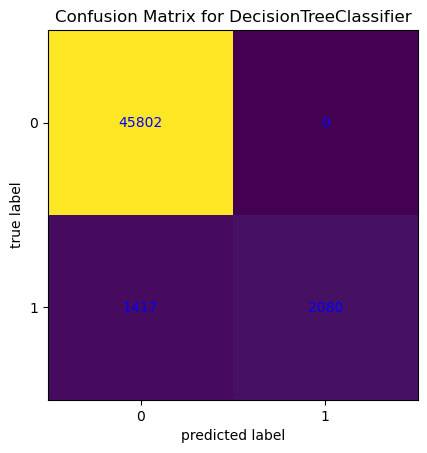

In [17]:
matrix = confusion_matrix(out_te, prediction)

print(confusion_matrix(out_te, prediction))

def cf_matrix(mat, tree_d, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(tree_d)))
    ax.set_yticks(range(0,len(tree_d)))
    ax.set_xticklabels(tree_d)
    ax.set_yticklabels(tree_d)

    for i in range(0,len(tree_d)):
        for j in range(0,len(tree_d)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="b")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(matrix,[0,1],'DecisionTreeClassifier')

print(classification_report(out_te, prediction))

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- HbA1c_level <= 5.35
|   |   |   |--- class: 0
|   |   |--- HbA1c_level >  5.35
|   |   |   |--- age <= 44.50
|   |   |   |   |--- bmi <= 34.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  34.14
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  44.50
|   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |--- class: 0
|   |--- blood_glucose_level >  210.00
|   |   |--- class: 1
|--- HbA1c_level >  6.70
|   |--- class: 1



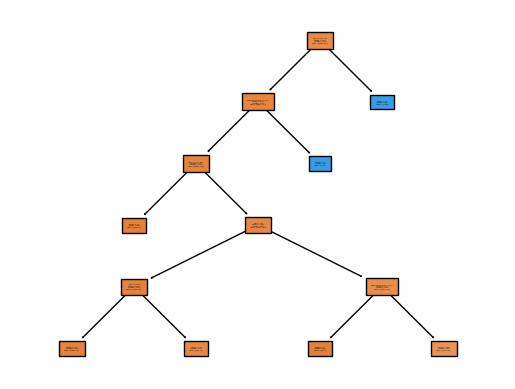

In [20]:
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
            'bmi', 'HbA1c_level', 'blood_glucose_level']

tree_p = tree.plot_tree(tree_d,fontsize=1, filled=True,feature_names=feature_names)

tree_t = tree.export_text(tree_d,feature_names=feature_names)
print(tree_t)

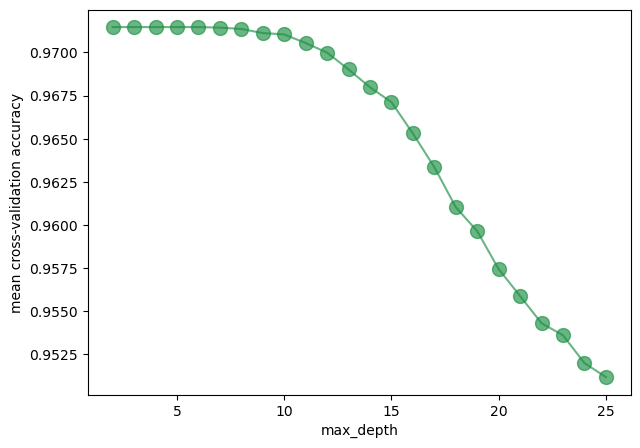

In [21]:
depths = range(2,26)
scores = list()


for i in depths:
    tree_alts = DecisionTreeClassifier(max_depth = i, random_state=42)
    score = cross_val_score(tree_alts, inputs, outputs, cv=3, scoring='accuracy')

    mean_score = score.mean()
    scores.append(mean_score)
    
plt.figure(figsize=(7,5))
plt.plot(depths, scores, '-o',markersize=10,alpha=0.65,color='#1b8e42')
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

In [23]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ONE
0,0,80.0,0,1,0,25.19,6.6,140,0,1
1,0,54.0,0,0,1,27.32,6.6,80,0,1
2,1,28.0,0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,2,23.45,5.0,155,0,1
4,1,76.0,1,1,2,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,1,27.32,6.2,90,0,1
99996,0,2.0,0,0,1,17.37,6.5,100,0,1
99997,1,66.0,0,0,3,27.83,5.7,155,0,1
99998,0,24.0,0,0,0,35.42,4.0,100,0,1


In [29]:
new_sample = np.array([1, 50, 1, 0, 2, 56.31, 6.2, 200]).reshape(1, -1)

# Use the trained model to make a prediction
prediction = tree_d.predict(new_sample)
    
probability = tree_d.predict_proba(new_sample)

# The probabilities are returned as an array, where the first element is the probability of class 0 and the second is the probability of class 1
probability_diabetes = probability[0, 1]

# Print the probability
print(f"Probability of having diabetes: {probability_diabetes:.2%}")

Probability of having diabetes: 12.78%
